# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


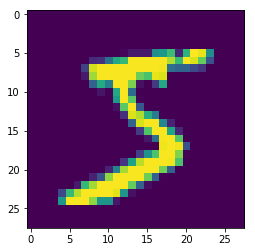

In [27]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [30]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [32]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

The Neural architecture :

28x28x1 || (3x3x1)*16 || 26x26x16  , Receptive field (3x3)

 26x26x16 || (3x3x16)*16 || 24x24x16 , Receptive field (5x5)
 
24x24x16 || (3x3x16)*32 || 22x22x32  , Receptive field (7x7)

batch normalization () Receptive field (7x7)

max pooling layer () 
22x22x32 || MP|| 11x11x32  ,Receptive field (14x14)

Dropout of 50%

Transition Layer (1X1x32)*32   
 11x11x32|| (1x1x32)*32||11x11x32 , Receptive field (14x14)
 
 11x11x32|| (3x3x32)*16||9x9x16 , Receptive field (16x16)
 
 batch normalization () Receptive field (16x16)

--- The second maxpooling layer was added to number of parameters, but it increased the receptive field.

 max pooling layer () 
9x9x16 || MP|| 4x4x16  ,Receptive field (32x32)

Dropout of 25%
 
 Transition Layer (1X1x16)*10   
 4x4x16|| (1x1x16)*10||4x4x10 , Receptive field (32x32)
 
 4x4x16|| (3x3x32)*10||2x2x32 , Receptive field (34x34)
 
 2x2x32|| (2x2x32)*10||1x1x10 , Receptive field (35x35)
 


In [33]:
from keras.layers import Activation,BatchNormalization
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu')) #24x24
model.add(Convolution2D(32, 3, 3, activation='relu')) #22x22

model.add(BatchNormalization())
#MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2,2))) # 11x11
# Drop out rate is 50%
model.add(Dropout(.5))
model.add(Convolution2D(32, 1, activation='relu'))#11x11
model.add(Convolution2D(16, 3, 3, activation='relu'))#9x9

model.add(BatchNormalization())
#MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2,2))) # 4x4
# Drop out rate is 25%
model.add(Dropout(.25))
model.add(Convolution2D(10, 1, activation='relu'))#4x4
model.add(Convolution2D(32, 3, 3, activation='relu'))#2x2
model.add(Convolution2D(10,2))

model.add(Flatten())
model.add(Activation('softmax')) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 32)        1056      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Training of Model was done with **increasing batch sizes for 10 epochs** .

1) Started with batch size = 64 in the first iteration ,training accuracy = ,validation accuracy = 

2)batch size = **64** in the first iteration ,training accuracy =**98.89**,validation accuracy = **98.64**

3) batch size = **128** in the first iteration ,training accuracy =**99.13**,validation accuracy =**99.02** 

4) batch size = **256** in the first iteration ,training accuracy =**99.35**,validation accuracy =**99.27**

5) batch size = **512** in the first iteration ,training accuracy =**99.50**,validation accuracy =**99.37**

Reducing the batch size by one fold to generalize the model and capture more information.

6)batch size = **256** in the first iteration ,training accuracy =**99.45**,validation accuracy =**99.15**

7) )batch size = **512** in the first iteration ,training accuracy =**99.58**,validation accuracy =**99.42**


In [56]:
model.fit(X_train, Y_train, batch_size=512, nb_epoch=10, verbose=1)

Epoch 1/10
 2560/60000 [>.............................] - ETA: 3s - loss: 0.0140 - acc: 0.9957

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 3s 43us/step - loss: 0.0136 - acc: 0.9952
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0134 - acc: 0.9954
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0138 - acc: 0.9955
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0130 - acc: 0.9956
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0122 - acc: 0.9958
Epoch 6/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0135 - acc: 0.9953
Epoch 7/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0116 - acc: 0.9959
Epoch 8/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0124 - acc: 0.9958
Epoch 9/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0140 - acc: 0.9954
Epoch 10/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0125 - acc: 0.9958


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [58]:
print(score)

[0.02364436819343455, 0.9942]


In [0]:
y_pred = model.predict(X_test)

In [40]:
print(y_pred[:9])
print(y_test[:9])

[[2.9955257e-11 3.4532028e-09 2.0105755e-07 3.7323158e-08 5.7541025e-12
  1.8772596e-08 9.0550701e-18 9.9999928e-01 3.0536587e-10 4.2461554e-07]
 [4.1620365e-06 6.1594706e-05 9.9992681e-01 5.7505044e-08 4.9869540e-09
  2.7502149e-09 7.2018752e-06 1.0180821e-08 1.1267986e-07 7.5310376e-11]
 [1.4119007e-08 9.9999309e-01 1.1948549e-08 2.7471756e-11 2.9498271e-06
  4.8294762e-08 1.1912640e-08 3.8644062e-06 1.2422249e-08 1.4720243e-09]
 [9.9956137e-01 2.8688967e-09 4.4459207e-06 1.7255171e-07 8.1351135e-07
  2.8990131e-05 3.5835218e-04 1.0991012e-06 3.3963386e-06 4.1339350e-05]
 [2.1490632e-06 2.0315016e-09 2.1863427e-07 2.1010045e-08 9.9893576e-01
  1.1571539e-07 4.2679794e-08 4.6774091e-09 3.4774325e-06 1.0582107e-03]
 [1.5108046e-08 9.9999738e-01 7.6354585e-09 1.5982132e-12 9.2666573e-07
  1.6380342e-08 5.2050728e-09 1.6549581e-06 2.8647609e-09 3.2061823e-10]
 [1.3227213e-09 2.0044740e-07 1.2527539e-07 3.6269685e-11 9.9968755e-01
  2.4226015e-08 4.8275303e-12 1.3716462e-04 1.9666080e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

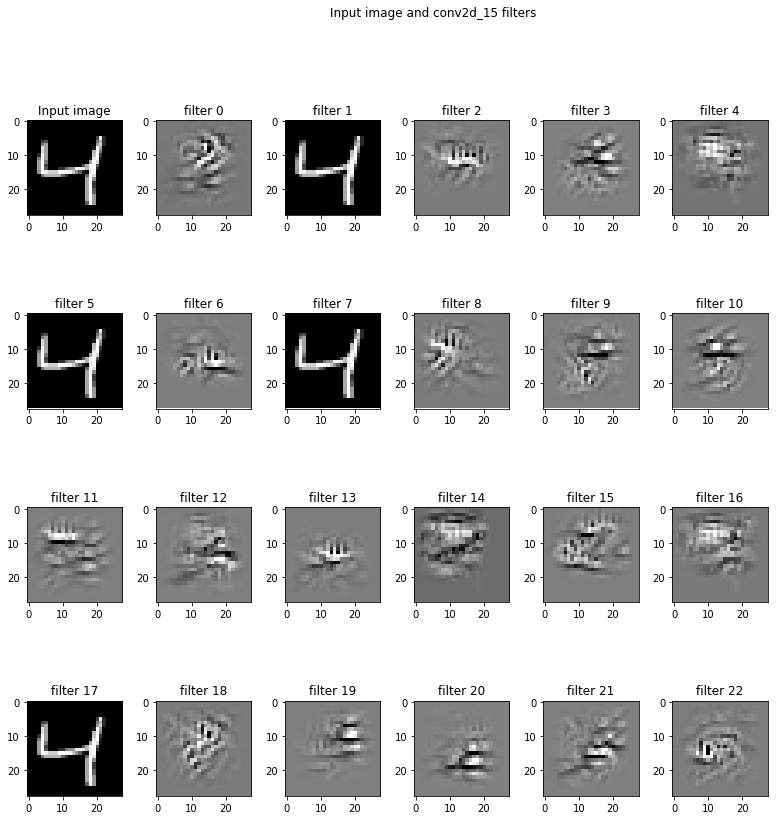

In [42]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_15'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()